# INTRODUCTION

In this ipynb file we prepare a machine learning model of student grade. The data can be downloaded from https://archive.ics.uci.edu/dataset/320/student+performance. The data set contains the data of two different school and two diffrent subjects mathmatics and portugese.
# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
2 sex - student's sex (binary: "F" - female or "M" - male)
3 age - student's age (numeric: from 15 to 22)
4 address - student's home address type (binary: "U" - urban or "R" - rural)
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
12 guardian - student's guardian (nominal: "mother", "father" or "other")
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16 schoolsup - extra educational support (binary: yes or no)
17 famsup - family educational support (binary: yes or no)
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19 activities - extra-curricular activities (binary: yes or no)
20 nursery - attended nursery school (binary: yes or no)
21 higher - wants to take higher education (binary: yes or no)
22 internet - Internet access at home (binary: yes or no)
23 romantic - with a romantic relationship (binary: yes or no)
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
30 absences - number of school absences (numeric: from 0 to 93)

NOTE: these grades are related with the course subject, Math or Portuguese:
31 G1 - first period grade (numeric: from 0 to 20)
31 G2 - second period grade (numeric: from 0 to 20)
32 G3 - final grade (numeric: from 0 to 20, output target)

# IMPORT LIBRARY

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, mean_absolute_error,confusion_matrix
from sklearn.pipeline import Pipeline
from scipy.stats import norm

import io
from IPython.display import Image  
import pickle



## READ CSV

In [59]:
#df = student that study math
df = pd.read_csv('student-por.csv')

## EDA

In [60]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

In [61]:
df.tail()

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
644  ...      5        4      2     1     2      5        4  10  11  10  
645  ...      4        3      4     1     1      1        4  15  15  16  
646  ...      1        1      1     1     1      5        6  11  12   9  
647  ...      2        4      5     3     4      2        6  10  10  10  
648  ...      4        4      1     3     4      5        4  10  11  11  

[5 rows x 33 columns]

In [62]:
df.shape

(649, 33)

In [63]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [65]:
df.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.051093    1.175766    0.924834    1.284380    1.446259   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  649.000000  649.000000  649.000000  649.000000  
mean     3.659476   11.399076   11.570108   11.906009  
std      4.640759    2.745265    2.913639    3.230656  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000   10.000000   10.000000   10.000000  
50%      2.000000   11.000000   11.000000   12.000000  
75%      6.000000   13.000000   13.000000   14.000000  
max     32.000000   19.000000   19.000000   19.000000

In [66]:
df.school.value_counts(normalize = True)

GP    0.651772
MS    0.348228
Name: school, dtype: float64

In [67]:
df.sex.value_counts(normalize=True)

F    0.590139
M    0.409861
Name: sex, dtype: float64

## Data Cleaning

In data cleaning section we search for null values in each and every column. But we did not find any null values. Similarly the catagorical variables are encoded into numerical forms. In this section we find out all catagorical variables and change and assign number to each value of catagorical column. Then we find out correlation between all feature and target variable. We remove features(column) with low correlation. Low correlation means that variable doesnot effect the result variable.

In [68]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [69]:
df.select_dtypes(exclude='number').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [70]:
df.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      24
G1            17
G2            16
G3            17
dtype: int64

In [71]:
print(df['school'].unique())
df['school'] = df['school'].map({'GP': 0, 'MS': 1}).astype(int)

['GP' 'MS']


In [72]:
print(df['sex'].unique())
df['sex'] = df['sex'].map({'M': 0, 'F': 1}).astype(int)

['F' 'M']


In [73]:
print(df['address'].unique())
df['address'] = df['address'].map({'R': 0, 'U': 1}).astype(int)

['U' 'R']


In [74]:
print(df['famsize'].unique())
df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1}).astype(int)

['GT3' 'LE3']


In [75]:
print(df['Pstatus'].unique())
df['Pstatus'] = df['Pstatus'].map({'A': 0, 'T': 1}).astype(int)

['A' 'T']


In [76]:
print(df['schoolsup'].unique())
df['schoolsup'] = df['schoolsup'].map({'no': 0, 'yes': 1}).astype(int)

['yes' 'no']


In [77]:
print(df['famsup'].unique())
df['famsup'] = df['famsup'].map({'no': 0, 'yes': 1}).astype(int)

['no' 'yes']


In [78]:
print(df['paid'].unique())
df['paid'] = df['paid'].map({'no': 0, 'yes': 1}).astype(int)

['no' 'yes']


In [79]:
print(df['activities'].unique())
df['activities'] = df['activities'].map({'no': 0, 'yes': 1}).astype(int)

['no' 'yes']


In [80]:
print(df['nursery'].unique())
df['nursery'] = df['nursery'].map({'no': 0, 'yes': 1}).astype(int)

['yes' 'no']


In [81]:
print(df['higher'].unique())
df['higher'] = df['higher'].map({'no': 0, 'yes': 1}).astype(int)


['yes' 'no']


In [82]:
print(df['internet'].unique())
df['internet'] = df['internet'].map({'no': 0, 'yes': 1}).astype(int)


['no' 'yes']


In [83]:
print(df['romantic'].unique())
df['romantic'] = df['romantic'].map({'no': 0, 'yes': 1}).astype(int)

['no' 'yes']


In [84]:
print(df['Mjob'].unique())
df['Mjob'] = df['Mjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)


['at_home' 'health' 'other' 'services' 'teacher']


In [85]:
print(df['Fjob'].unique())
df['Fjob'] = df['Fjob'].map({'at_home': 0, 'health': 1, 'other': 2, 'services': 3, 'teacher': 4}).astype(int)


['teacher' 'other' 'services' 'health' 'at_home']


In [86]:
print(df['reason'].unique())
df['reason'] = df['reason'].map({'course': 0, 'other': 1, 'home': 2, 'reputation': 3}).astype(int)


['course' 'other' 'home' 'reputation']


In [87]:
print(df['guardian'].unique())
df['guardian'] = df['guardian'].map({'mother': 0, 'father': 1, 'other': 2}).astype(int)

['mother' 'father' 'other']


In [88]:
df.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    1   18        1        1        0     4     4     0     4  ...   
1       0    1   17        1        1        1     1     1     0     2  ...   
2       0    1   15        1        0        1     1     1     0     2  ...   
3       0    1   15        1        1        1     4     2     1     3  ...   
4       0    1   16        1        1        1     3     3     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         4   0  11  11  
1       5         3      3     1     1       3         2   9  11  11  
2       4         3      2     2     3       3         6  12  13  12  
3       3         2      2     1     1       5         0  14  14  14  
4       4         3      2     1     2       5         0  11  13  13  

[5 rows x 33 columns]

C:\Users\mahar\AppData\Local\Temp\ipykernel_13664\4200203523.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.G3)


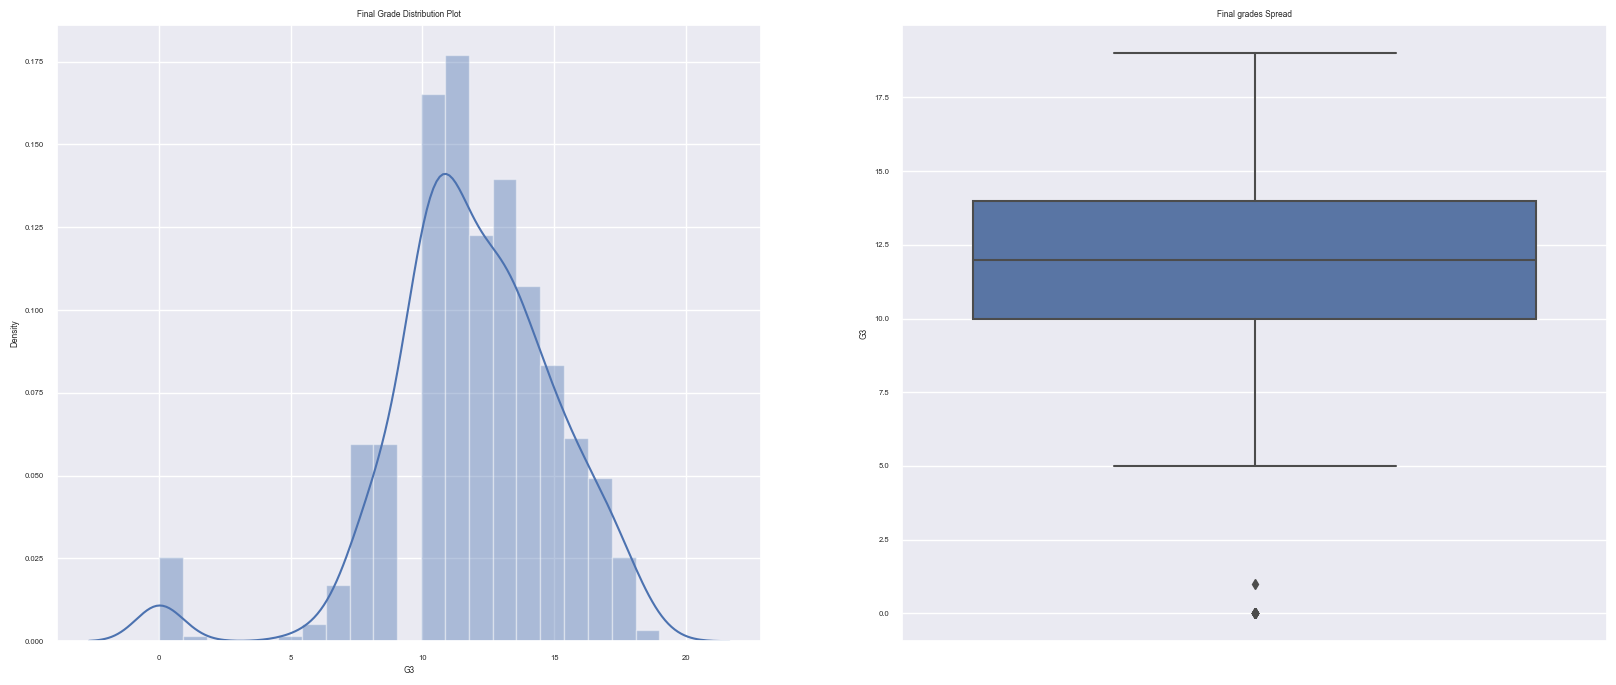

In [89]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Final Grade Distribution Plot")
sns.distplot(df.G3)

plt.subplot(1,2,2)
plt.title("Final grades Spread")
sns.boxplot(y=df.G3)

plt.show()

In [90]:
df.G3.describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

## Model Formation

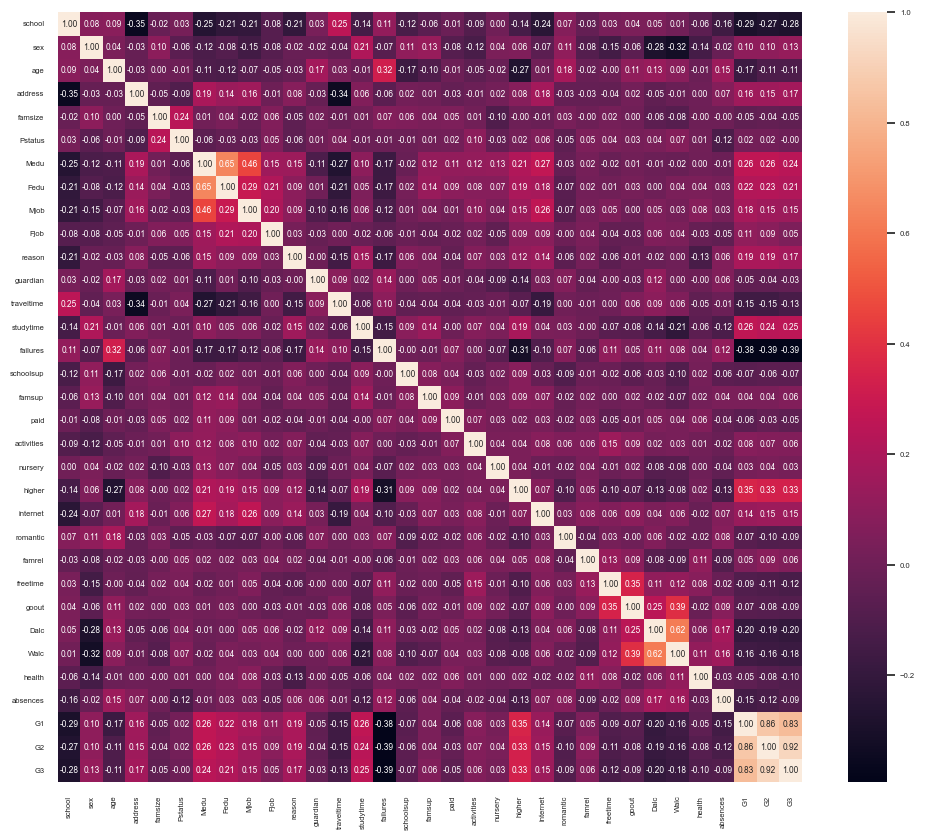

In [91]:
plt.figure(figsize=(12,10))
sns.set(font_scale=0.5)
sns.heatmap(df.corr(),annot=True,fmt="0.2f")
plt.show()

In [92]:
df.corr()['G3'].sort_values(ascending=False)

G3            1.000000
G2            0.918548
G1            0.826387
higher        0.332172
studytime     0.249789
Medu          0.240151
Fedu          0.211800
reason        0.171707
address       0.167637
internet      0.150025
Mjob          0.148252
sex           0.129077
famrel        0.063361
activities    0.059791
famsup        0.059206
Fjob          0.052953
nursery       0.028752
Pstatus      -0.000754
guardian     -0.029474
famsize      -0.045016
paid         -0.054898
schoolsup    -0.066405
goout        -0.087641
romantic     -0.090583
absences     -0.091379
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
Walc         -0.176619
Dalc         -0.204719
school       -0.284294
failures     -0.393316
Name: G3, dtype: float64

In [93]:
grades_corr = df.corr()['G3']

In [94]:
grades_corr = pd.DataFrame({'col':grades_corr.index, 'correlation':grades_corr.values})

In [95]:
no_corr_cols = grades_corr[(grades_corr.correlation < 0.1) & (grades_corr.correlation > -0.1)]
no_corr_cols = list(no_corr_cols.col)
print(no_corr_cols)

['famsize', 'Pstatus', 'Fjob', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'romantic', 'famrel', 'goout', 'health', 'absences']


In [96]:
df = df.drop(no_corr_cols, axis=1)

In [97]:
X = df.drop(['G3'], axis=1)
y = df['G3']

In [98]:
X.head()

school  sex  age  address  Medu  Fedu  Mjob  reason  traveltime  studytime  \
0       0    1   18        1     4     4     0       0           2          2   
1       0    1   17        1     1     1     0       0           1          2   
2       0    1   15        1     1     1     0       1           1          2   
3       0    1   15        1     4     2     1       2           1          3   
4       0    1   16        1     3     3     2       2           1          2   

   failures  higher  internet  freetime  Dalc  Walc  G1  G2  
0         0       1         0         3     1     1   0  11  
1         0       1         1         3     1     1   9  11  
2         0       1         1         3     2     3  12  13  
3         0       1         1         2     1     1  14  14  
4         0       1         0         3     1     2  11  13

In [99]:
y.head()

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [101]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

y_pred = linear_regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.9818183475271886
Mean Absolute Error (MAE): 0.7600387697505238
R-squared (R2): 0.8617917465748527


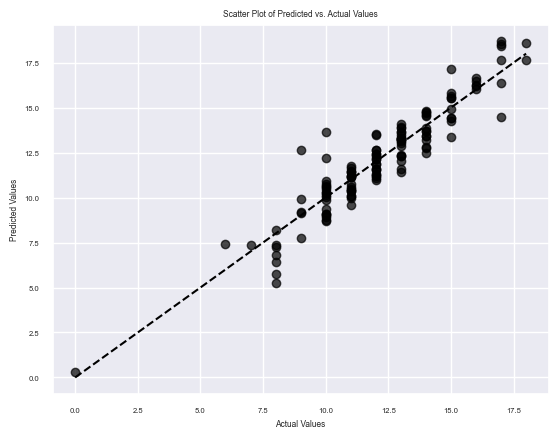

In [102]:
plt.scatter(y_test, y_pred,color='black', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', label="45-Degree Line")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot of Predicted vs. Actual Values")
plt.show()

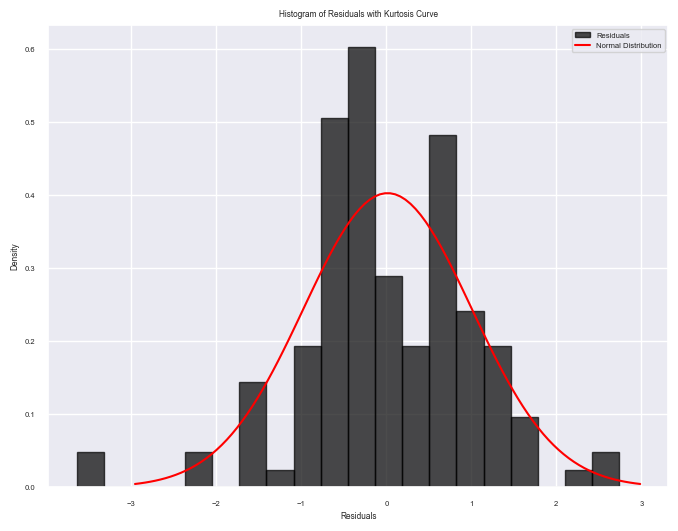

In [103]:

residuals = y_test - y_pred

plt.figure(figsize=(8, 6))

# Plotting the histogram
plt.hist(residuals, bins=20, edgecolor='black', color='black', alpha=0.7, density=True, label="Residuals")

# Plotting the normal distribution curve
mu, sigma = np.mean(residuals), np.std(residuals)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, norm.pdf(x, mu, sigma), color='red', label="Normal Distribution")

plt.title("Histogram of Residuals with Kurtosis Curve")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.grid(True)
plt.legend()
plt.show()

In [104]:
ridge = Ridge()

# Define a range of alpha values to test
alphas = np.logspace(-6, 6, 13)

# Perform grid search using cross-validation to find the best alpha
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha value and corresponding model
best_alpha = grid_search.best_params_['alpha']
best_ridge_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best Alpha: {best_alpha}")
print(f"Best Ridge Model: {best_ridge_model}")
print(f"Mean Squared Error on Test Set: {mse:.4f}")



Best Alpha: 100.0
Best Ridge Model: Ridge(alpha=100.0)
Mean Squared Error on Test Set: 0.9373


In [105]:
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train, y_train)

Ridge(alpha=100.0)

In [106]:
y_pred = ridge_model.predict(X_test)
pmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.9372570046627366
Mean Absolute Error (MAE): 0.7560803433089988
R-squared (R2): 0.8680645417238602


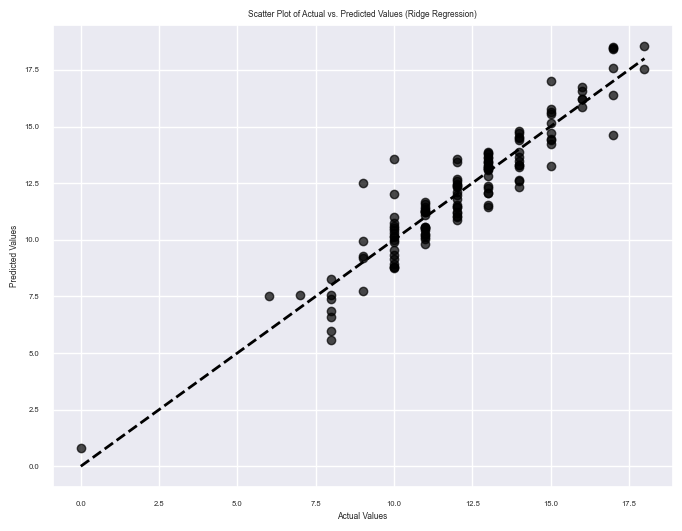

In [107]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='black', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', linewidth=2)
plt.title("Scatter Plot of Actual vs. Predicted Values (Ridge Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

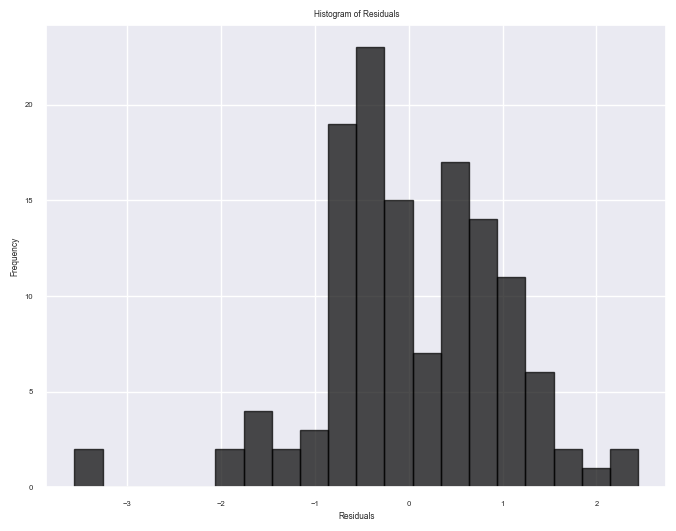

In [108]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black',color='black', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [109]:
decision_tree_model = DecisionTreeRegressor()  
param_grid = {
    'max_depth': range(4,22)
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(estimator=decision_tree_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV instance on your training data
grid_search.fit(X_train, y_train)

# Get the best parameter values and best model
best_max_depth = grid_search.best_params_['max_depth']
best_model = grid_search.best_estimator_

# Now you can use the best model for predictions
y_pred = best_model.predict(X_test)

print(best_max_depth)




4


In [110]:
decision_tree_model = DecisionTreeRegressor(max_depth=14)  
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(decision_tree_model.score(X_test, y_test))
print(f"Mean Squared Error: {mse}")

0.6705267171616209
Mean Squared Error: 2.3405470085470084


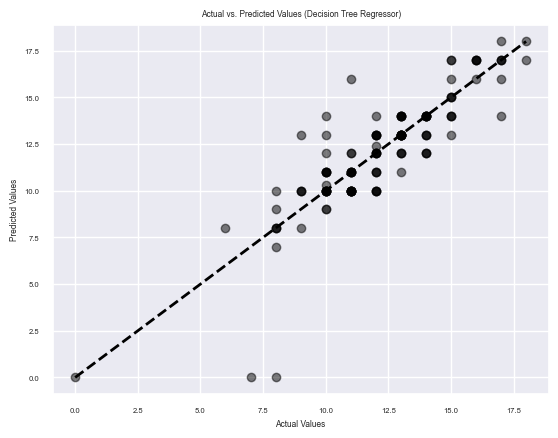

In [111]:

plt.scatter(y_test, y_pred, color='black', alpha=0.5)  
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='black', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Decision Tree Regressor)")
plt.show()


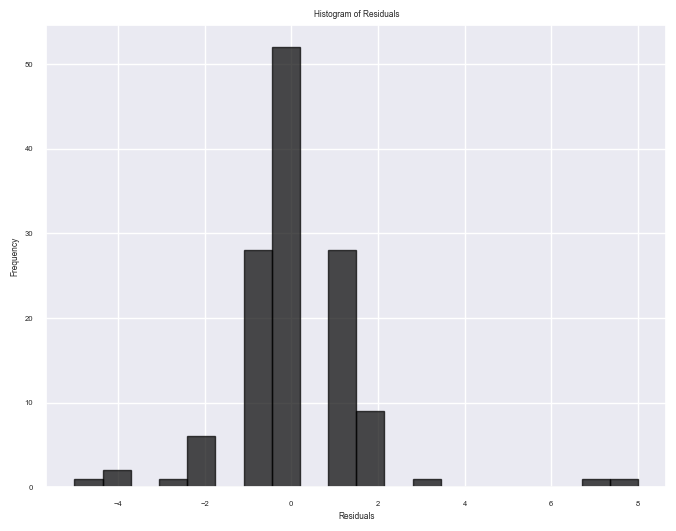

In [112]:

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black',color='black', alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [113]:
# save model as pickle file for web app
pickle.dump(linear_regression, open('linear_model.pkl', 'wb'))
pickle.dump(ridge_model, open("ridge_model.pkl", 'wb'))
pickle.dump(decision_tree_model, open('decision_tree.pkl', 'wb'))